In [1]:
# koneksikan dengan google drive 
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os

In [ ]:
no_findings = ('/content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/Tugas Besar/Dataset/Splitted/train/no_findings')
covid = ('/content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/Tugas Besar/Dataset/Splitted/train/covid')
normal = ('/content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/Tugas Besar/Dataset/Splitted/train/normal')
pneumonia_bacteria = ('/content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/Tugas Besar/Dataset/Splitted/train/pneumonia_bacterial')
pneumonia_viral = ('/content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/Tugas Besar/Dataset/Splitted/train/pneumonia_viral')

print('total training no_findings images:', len(os.listdir(no_findings)))
print('total training covid images:', len(os.listdir(covid)))
print('total training normal images:', len(os.listdir(normal)))
print('total training pneumonia_bacteria images:', len(os.listdir(pneumonia_bacteria)))
print('total training pneumonia_viral images:', len(os.listdir(pneumonia_viral)))


no_findings_files = os.listdir(no_findings)
print(no_findings_files[:10])

covid_files = os.listdir(covid)
print(covid_files[:10])

normal_files = os.listdir(normal)
print(normal_files[:10])

pneumonia_bacteria_files = os.listdir(pneumonia_bacteria)
print(covid_files[:10])

pneumonia_viral_files = os.listdir(pneumonia_viral)
print(normal_files[:10])

total training no_findings images: 400
total training covid images: 256
total training normal images: 356
total training pneumonia_bacteria images: 359
total training pneumonia_viral images: 339
['00003384_000.png', '00002863_003.png', '00001697_001.png', '00001820_002.png', '00002678_004.png', '00003497_001.png', '00001471_001.png', '00002288_010.png', '00002032_003.png', '00003748_000.png']
['1-s2.0-S0929664620300449-gr2_lrg-c(1).jpg', '1-s2.0-S0140673620303706-fx1_lrg(1).jpg', '1-s2.0-S0929664620300449-gr2_lrg-a(1).jpg', '1-s2.0-S1684118220300608-main.pdf-001(1).jpg', '41591_2020_819_Fig1_HTML.webp-day10(1).png', '5931B64A-7B97-485D-BE60-3F1EA76BC4F0(1).jpeg', 'aspiration-pneumonia-5-day0(1).jpg', 'aspiration-pneumonia-5-day27.jpg', '1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2a.png', '1-s2.0-S0929664620300449-gr2_lrg-d.jpg']
['IM-0063-0001.jpeg', 'IM-0006-0001.jpeg', 'IM-0003-0001.jpeg', 'IM-0037-0001.jpeg', 'IM-0005-0001.jpeg', 'IM-0073-0001.jpeg', 'IM-0075-0001.jpeg', 

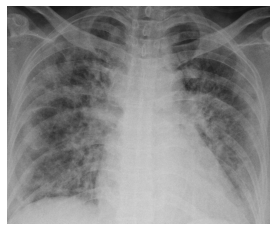

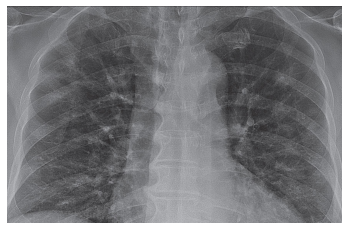

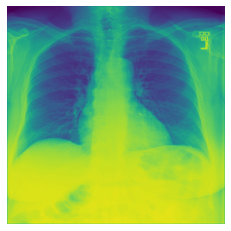

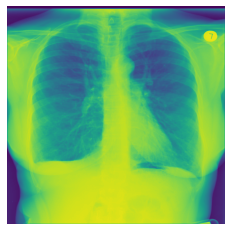

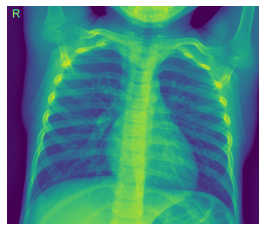

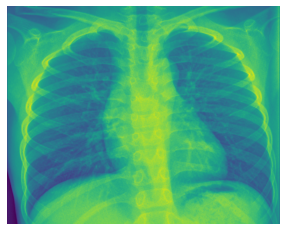

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_covid = [os.path.join(covid, fname) 
                for fname in covid_files[pic_index-2:pic_index]]
next_no_findings = [os.path.join(no_findings, fname) 
                for fname in no_findings_files[pic_index-2:pic_index]]
next_normal = [os.path.join(normal, fname) 
                for fname in normal_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_covid+next_no_findings+next_normal):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [3]:
height = 150
width = 150
batch_size = 32

In [4]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

generator_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


TRAINING_DIR = "/content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/Tugas Besar/Dataset/Splitted/train"
train_generator = generator_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(height, width),
	class_mode='categorical',
  batch_size=batch_size
)

VALIDATION_DIR = "/content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/Tugas Besar/Dataset/Splitted/val"
validation_generator = generator_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(height,width),
	class_mode='categorical',
  batch_size=batch_size
)

Found 1710 images belonging to 5 classes.
Found 212 images belonging to 5 classes.


In [5]:
# Tulis Kode Anda Disini
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPool2D, Dropout

In [21]:
# Feature Extraction Layer
model_1 = Sequential()

model_1.add(InputLayer(input_shape=[150,150,3]))
model_1.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model_1.add(MaxPool2D(pool_size=2, padding='same'))
model_1.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model_1.add(MaxPool2D(pool_size=2, padding='same'))
model_1.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model_1.add(MaxPool2D(pool_size=2, padding='same'))
model_1.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model_1.add(GlobalMaxPool2D())
model_1.add(Flatten())
model_1.add(Dropout(0.001))

In [22]:
# Fully Connected Layer
model_1.add(Dense(512, activation='relu'))
model_1.add(Dropout(0.001))
model_1.add(Dense(256, activation='relu'))
model_1.add(Dropout(0.05))
model_1.add(Dense(5, activation='sigmoid'))

In [23]:
model_1.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 38, 38, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 38, 38, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 19, 19, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 19, 19, 128)      

In [24]:
# Compile model
from tensorflow.keras.optimizers import Adam

model_1.compile(optimizer=Adam(lr=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [25]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [26]:
# setting Callback so we can save the best model in format h5 and i save it in my drive
callbacks = EarlyStopping(monitor='val_loss', patience=100, verbose=1, mode='auto')        
directory_to_save_best_model_file = '/content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/Tugas Besar/model_drop_batch_weight_from_callback.h5'
best_model = ModelCheckpoint(directory_to_save_best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [27]:
history = model_1.fit(train_generator, epochs=100, validation_data = validation_generator, verbose = 1, callbacks = [callbacks, best_model])

Epoch 1/50
54/54 [==============================] - 131s 2s/step - loss: 1.5955 - acc: 0.2702 - val_loss: 1.6229 - val_acc: 0.1509

Epoch 00001: val_acc improved from -inf to 0.15094, saving model to /content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/Tugas Besar/model_drop_batch_weight_from_callback.h5
Epoch 2/50
54/54 [==============================] - 129s 2s/step - loss: 1.5595 - acc: 0.3129 - val_loss: 1.5640 - val_acc: 0.2877

Epoch 00002: val_acc improved from 0.15094 to 0.28774, saving model to /content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/Tugas Besar/model_drop_batch_weight_from_callback.h5
54/54 [==============================] - 129s 2s/step - loss: 1.4314 - acc: 0.3743 - val_loss: 1.4900 - val_acc: 0.4009

Epoch 00003: val_acc improved from 0.28774 to 0.40094, saving model to /content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/Tugas Besar/model_drop_batch_weight_from_callback.h5
Epoch 4/50
54/54 [=========

In [29]:
# lets set some of parameter in metric accuracy to look the graph when training the model
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

In [34]:
# import matplotlib as plt
# plotting
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

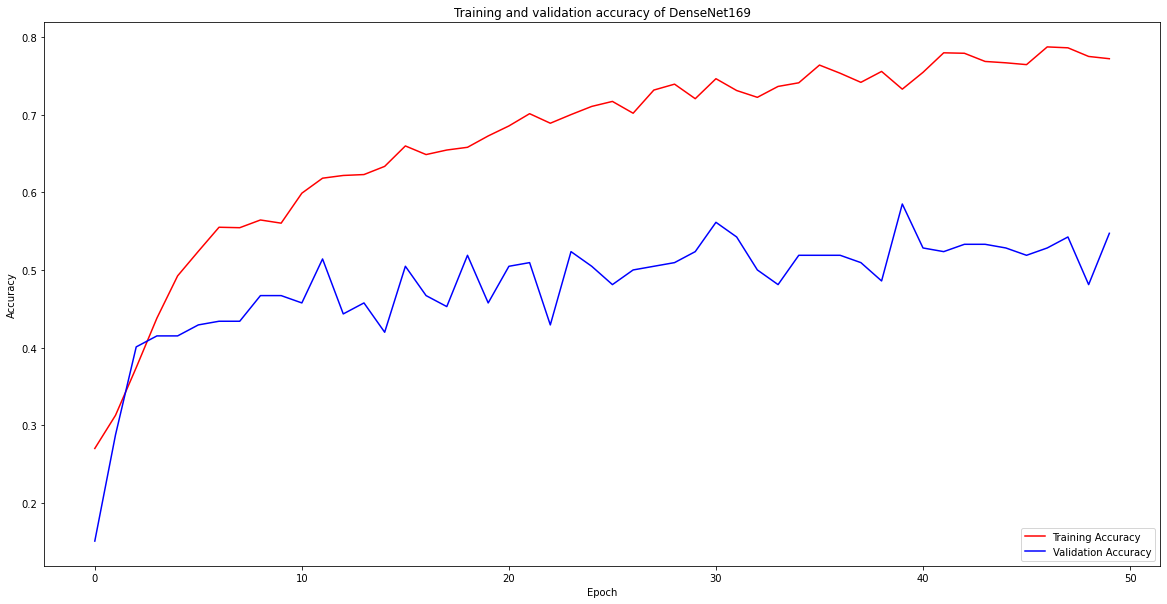

In [35]:
# plot the training and validation accuracy model
fig = plt.figure(figsize=(20,10))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy of DenseNet169')
#plt.ylim([0.7, 1])
plt.legend(loc='lower right')
#plt.show()
# fig.savefig('/content/gdrive/MyDrive/1. Colab Notebooks/Skripsi/model DenseNet/DenseNet 169/Densenet +adam+ llr (0,0001)/Accuracy_curve_densenet.jpg')

Text(0.5, 1.0, 'Training and validation loss of Densenet169')

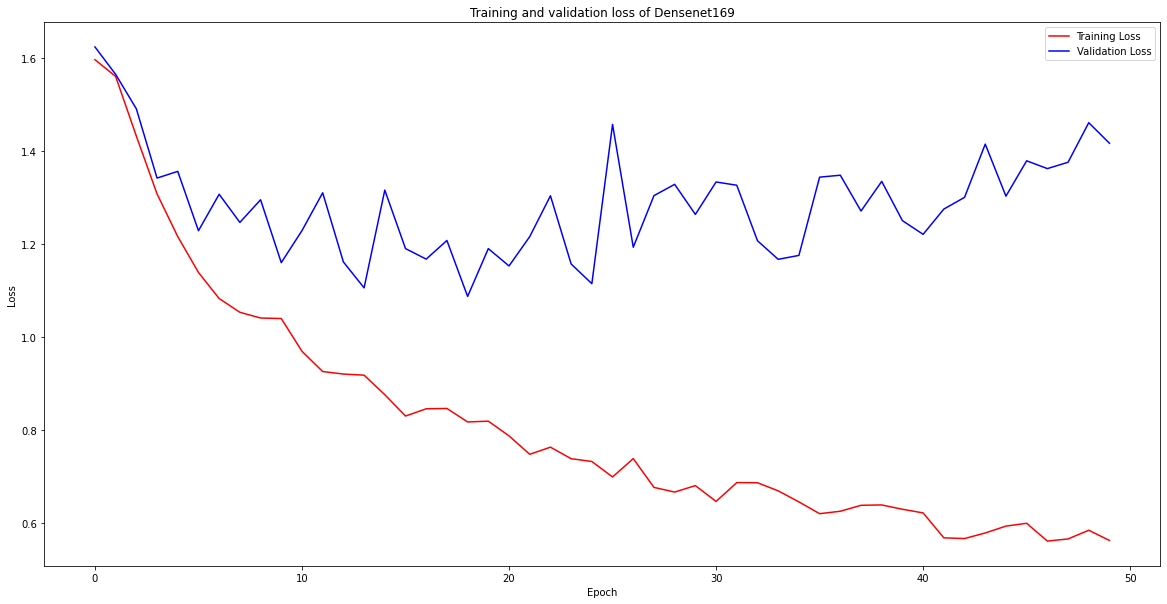

In [36]:
# ploting the training and validation loss
fig2 = plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss of Densenet169')
# fig2.savefig('/content/gdrive/MyDrive/1. Colab Notebooks/Skripsi/model DenseNet/DenseNet 169/Densenet +adam+ llr (0,0001)/Loss_curve_densenet.jpg')

In [37]:
# import some of library to evaluate model
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [38]:
# import some of library that we need to look the confusion matrix, recall, f1_score, and accuracy score to look how much your model is well
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

import seaborn as sns
sns.set(style='whitegrid')

In [39]:
# loading model to evaluate more depth
from keras.models import load_model
model_path = '/content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/Tugas Besar/model_drop_batch_weight_from_callback.h5'
model = load_model(model_path)

Found 216 images belonging to 5 classes.
7/7 [==============================] - 8s 1s/step
Accuracy  : 0.21296296296296297
Precision : 0.20667106035961244
f1Score : 0.20775310700009494
[[10  4 12 14 10]
 [ 6  2 12  7  5]
 [12  6 11  9  7]
 [ 4  6 11 15 10]
 [ 9  5  8 13  8]]


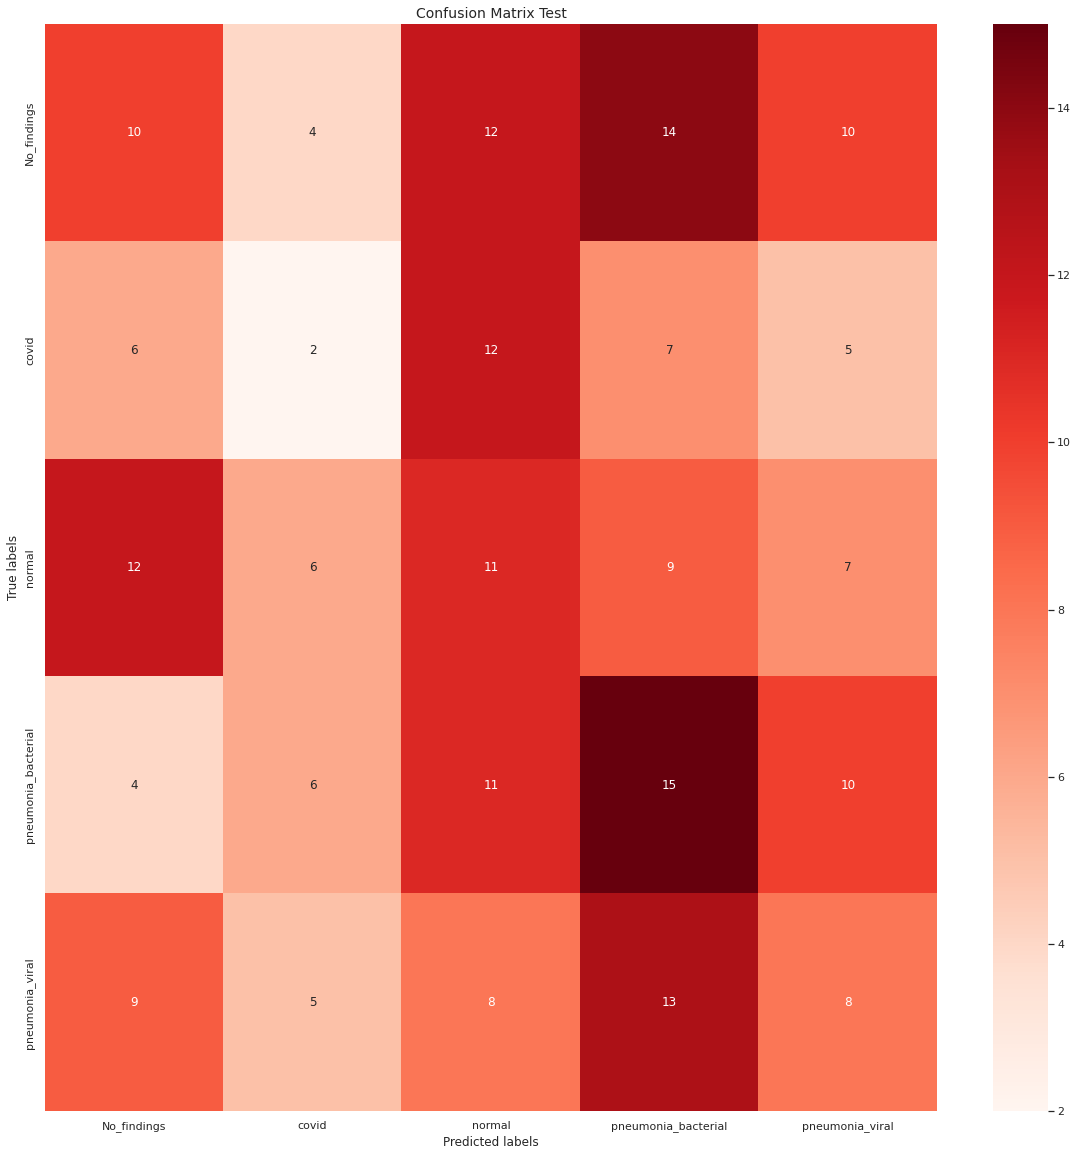

In [41]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

height=150; width=150
batch_size=32


generator_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


TESTING_DIR = "/content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/Tugas Besar/Dataset/Splitted/test"
test_generator = generator_datagen.flow_from_directory(
	TESTING_DIR,
	target_size=(height, width),
	class_mode='categorical',
  batch_size=batch_size
)

predictions = model.predict(test_generator, verbose=1)
yPredictions = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_names = test_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(20,20))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(5,5)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()


In [42]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, yPredictions, target_names=class_names))

                     precision    recall  f1-score   support

        No_findings       0.24      0.20      0.22        50
              covid       0.09      0.06      0.07        32
             normal       0.20      0.24      0.22        45
pneumonia_bacterial       0.26      0.33      0.29        46
    pneumonia_viral       0.20      0.19      0.19        43

           accuracy                           0.21       216
          macro avg       0.20      0.20      0.20       216
       weighted avg       0.21      0.21      0.21       216

